## 0.1) imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import datetime as dt

In [2]:
csv_file_october_forecast_and_actual_solar = './energy-charts_Forecasts_and_actual_values_in_Germany_in_October_2024.csv'
csv_file_week_27_solar = './energy-charts_Forecasts_and_actual_values_in_Germany_in_week_27_2024.csv'
csv_file_week_27_prices = './energy-charts_Electricity_production_and_spot_prices_in_Germany_in_week_27_2024.csv'

data = pd.read_csv(csv_file_october_forecast_and_actual_solar, skiprows=1)
data_actual_forecast_solar_w27_2024 = pd.read_csv(csv_file_week_27_solar, skiprows= 1)
data_spot_prices_w27_2024 = pd.read_csv(csv_file_week_27_prices, skiprows= 1)

# data = pd.read_csv(csv_file)

data

,Unnamed: 0,Power (MW),Power (MW).1
0,2024-10-01T00:00+02:00,0.0,0.0
1,2024-10-01T00:15+02:00,0.0,0.0
2,2024-10-01T00:30+02:00,0.0,0.0
3,2024-10-01T00:45+02:00,0.0,0.0
4,2024-10-01T01:00+02:00,0.0,0.0
...,...,...,...
2948,2024-10-31T16:00+01:00,NaN,1900.8
2949,2024-10-31T16:15+01:00,NaN,1102.6
2950,2024-10-31T16:30+01:00,NaN,514.0
2951,2024-10-31T16:45+01:00,NaN,148.2


In [3]:
df = data.copy()
df.columns = ['date', 'solar', 'solar_forecast']
df['date'] = pd.to_datetime(df['date'], utc= True)
df.set_index('date', inplace= True)
df

,solar,solar_forecast
date,,
2024-09-30 22:00:00+00:00,0.0,0.0
2024-09-30 22:15:00+00:00,0.0,0.0
2024-09-30 22:30:00+00:00,0.0,0.0
2024-09-30 22:45:00+00:00,0.0,0.0
2024-09-30 23:00:00+00:00,0.0,0.0
...,...,...
2024-10-31 15:00:00+00:00,NaN,1900.8
2024-10-31 15:15:00+00:00,NaN,1102.6
2024-10-31 15:30:00+00:00,NaN,514.0


Text(0, 0.5, 'Power / MWh')

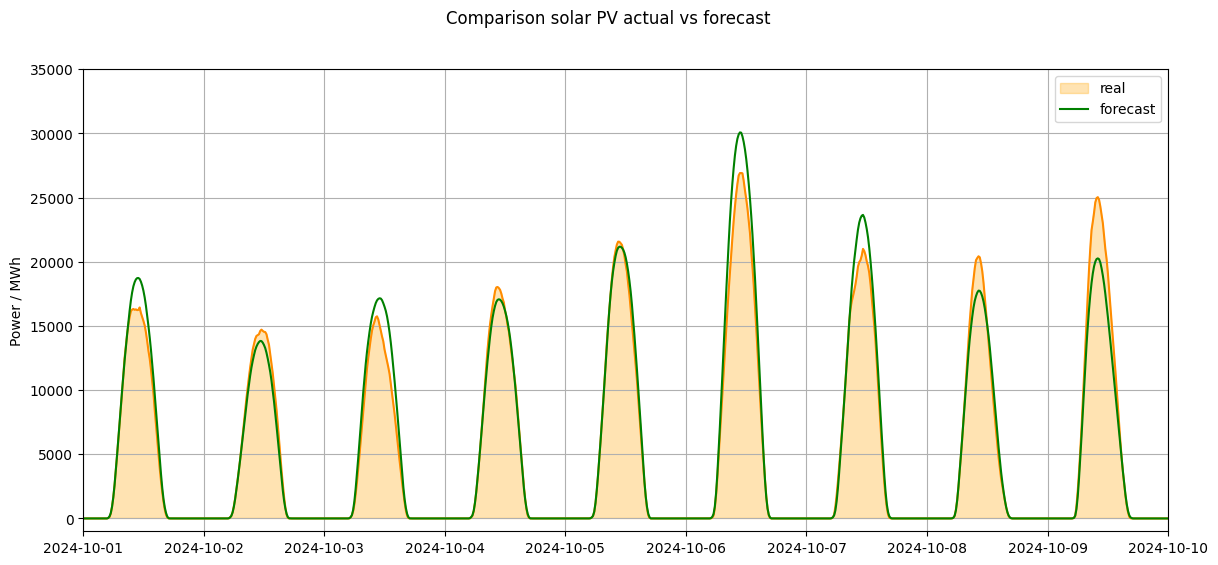

In [4]:
plt.figure(figsize=(14,6))

plt.suptitle('Comparison solar PV actual vs forecast')

ax = plt.gca()
plt.plot(df['solar'], c='darkorange', fillstyle='full')
# ax1.plot(r["date"], r["close"], lw=2)
plt.fill_between(df.index, 0, df["solar"], alpha=0.3, color='orange', label='real')
plt.plot(df['solar_forecast'], color='green', label='forecast')
plt.grid()
ax.set_xlim(dt.date(2024,10,1), dt.date(2024, 10, 10))
ax.set_ylim(-1000, 35000)
plt.legend()
plt.ylabel('Power / MWh')

# plt.fill_between(x=df.index, y1=df['solar'], y2=0)
# plt.title('solar')

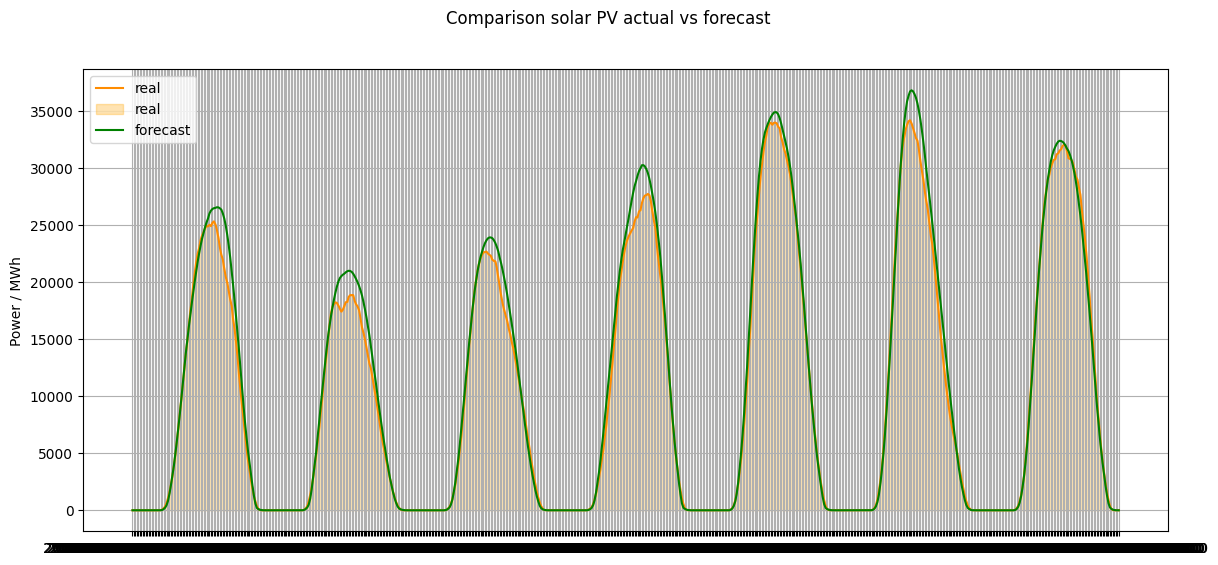

In [5]:
def plot_actual_vs_forecast_PV(data_actual_forecast_solar: pd.DataFrame) -> None:
    df = data_actual_forecast_solar.copy()
    df.columns = ['date', 'solar', 'solar_forecast']
    df.index = pd.to_datetime(df['date'], utc= True)
    df.set_index('date', inplace= True)

    plt.figure(figsize=(14,6))
    ax = plt.gca()

    plt.suptitle('Comparison solar PV actual vs forecast')

    plt.plot(df['solar'], c='darkorange', fillstyle='full', label='real')
    plt.fill_between(df.index, 0, df["solar"], alpha=0.3, color='orange', label='real')

    plt.plot(df['solar_forecast'], color='green', label='forecast')

    plt.ylabel('Power / MWh')

    # Set Axes (optional)
    # ax.set_xlim(dt.date(2024,10,1), dt.date(2024, 10, 10))
    # ax.set_ylim(-1000, 35000)

    plt.grid()
    plt.legend()


plot_actual_vs_forecast_PV(data_actual_forecast_solar_w27_2024)

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from pypalettes import load_cmap
from pyfonts import load_font
from highlight_text import fig_text, ax_text
from drawarrow import fig_arrow, ax_arrow

cmap = load_cmap('Coconut', cmap_type='continuous', reverse=True)
font = load_font('https://github.com/coreyhu/Urbanist/blob/main/fonts/ttf/Urbanist-Light.ttf?raw=true')
bold_font = load_font('https://github.com/coreyhu/Urbanist/blob/main/fonts/ttf/Urbanist-Medium.ttf?raw=true')

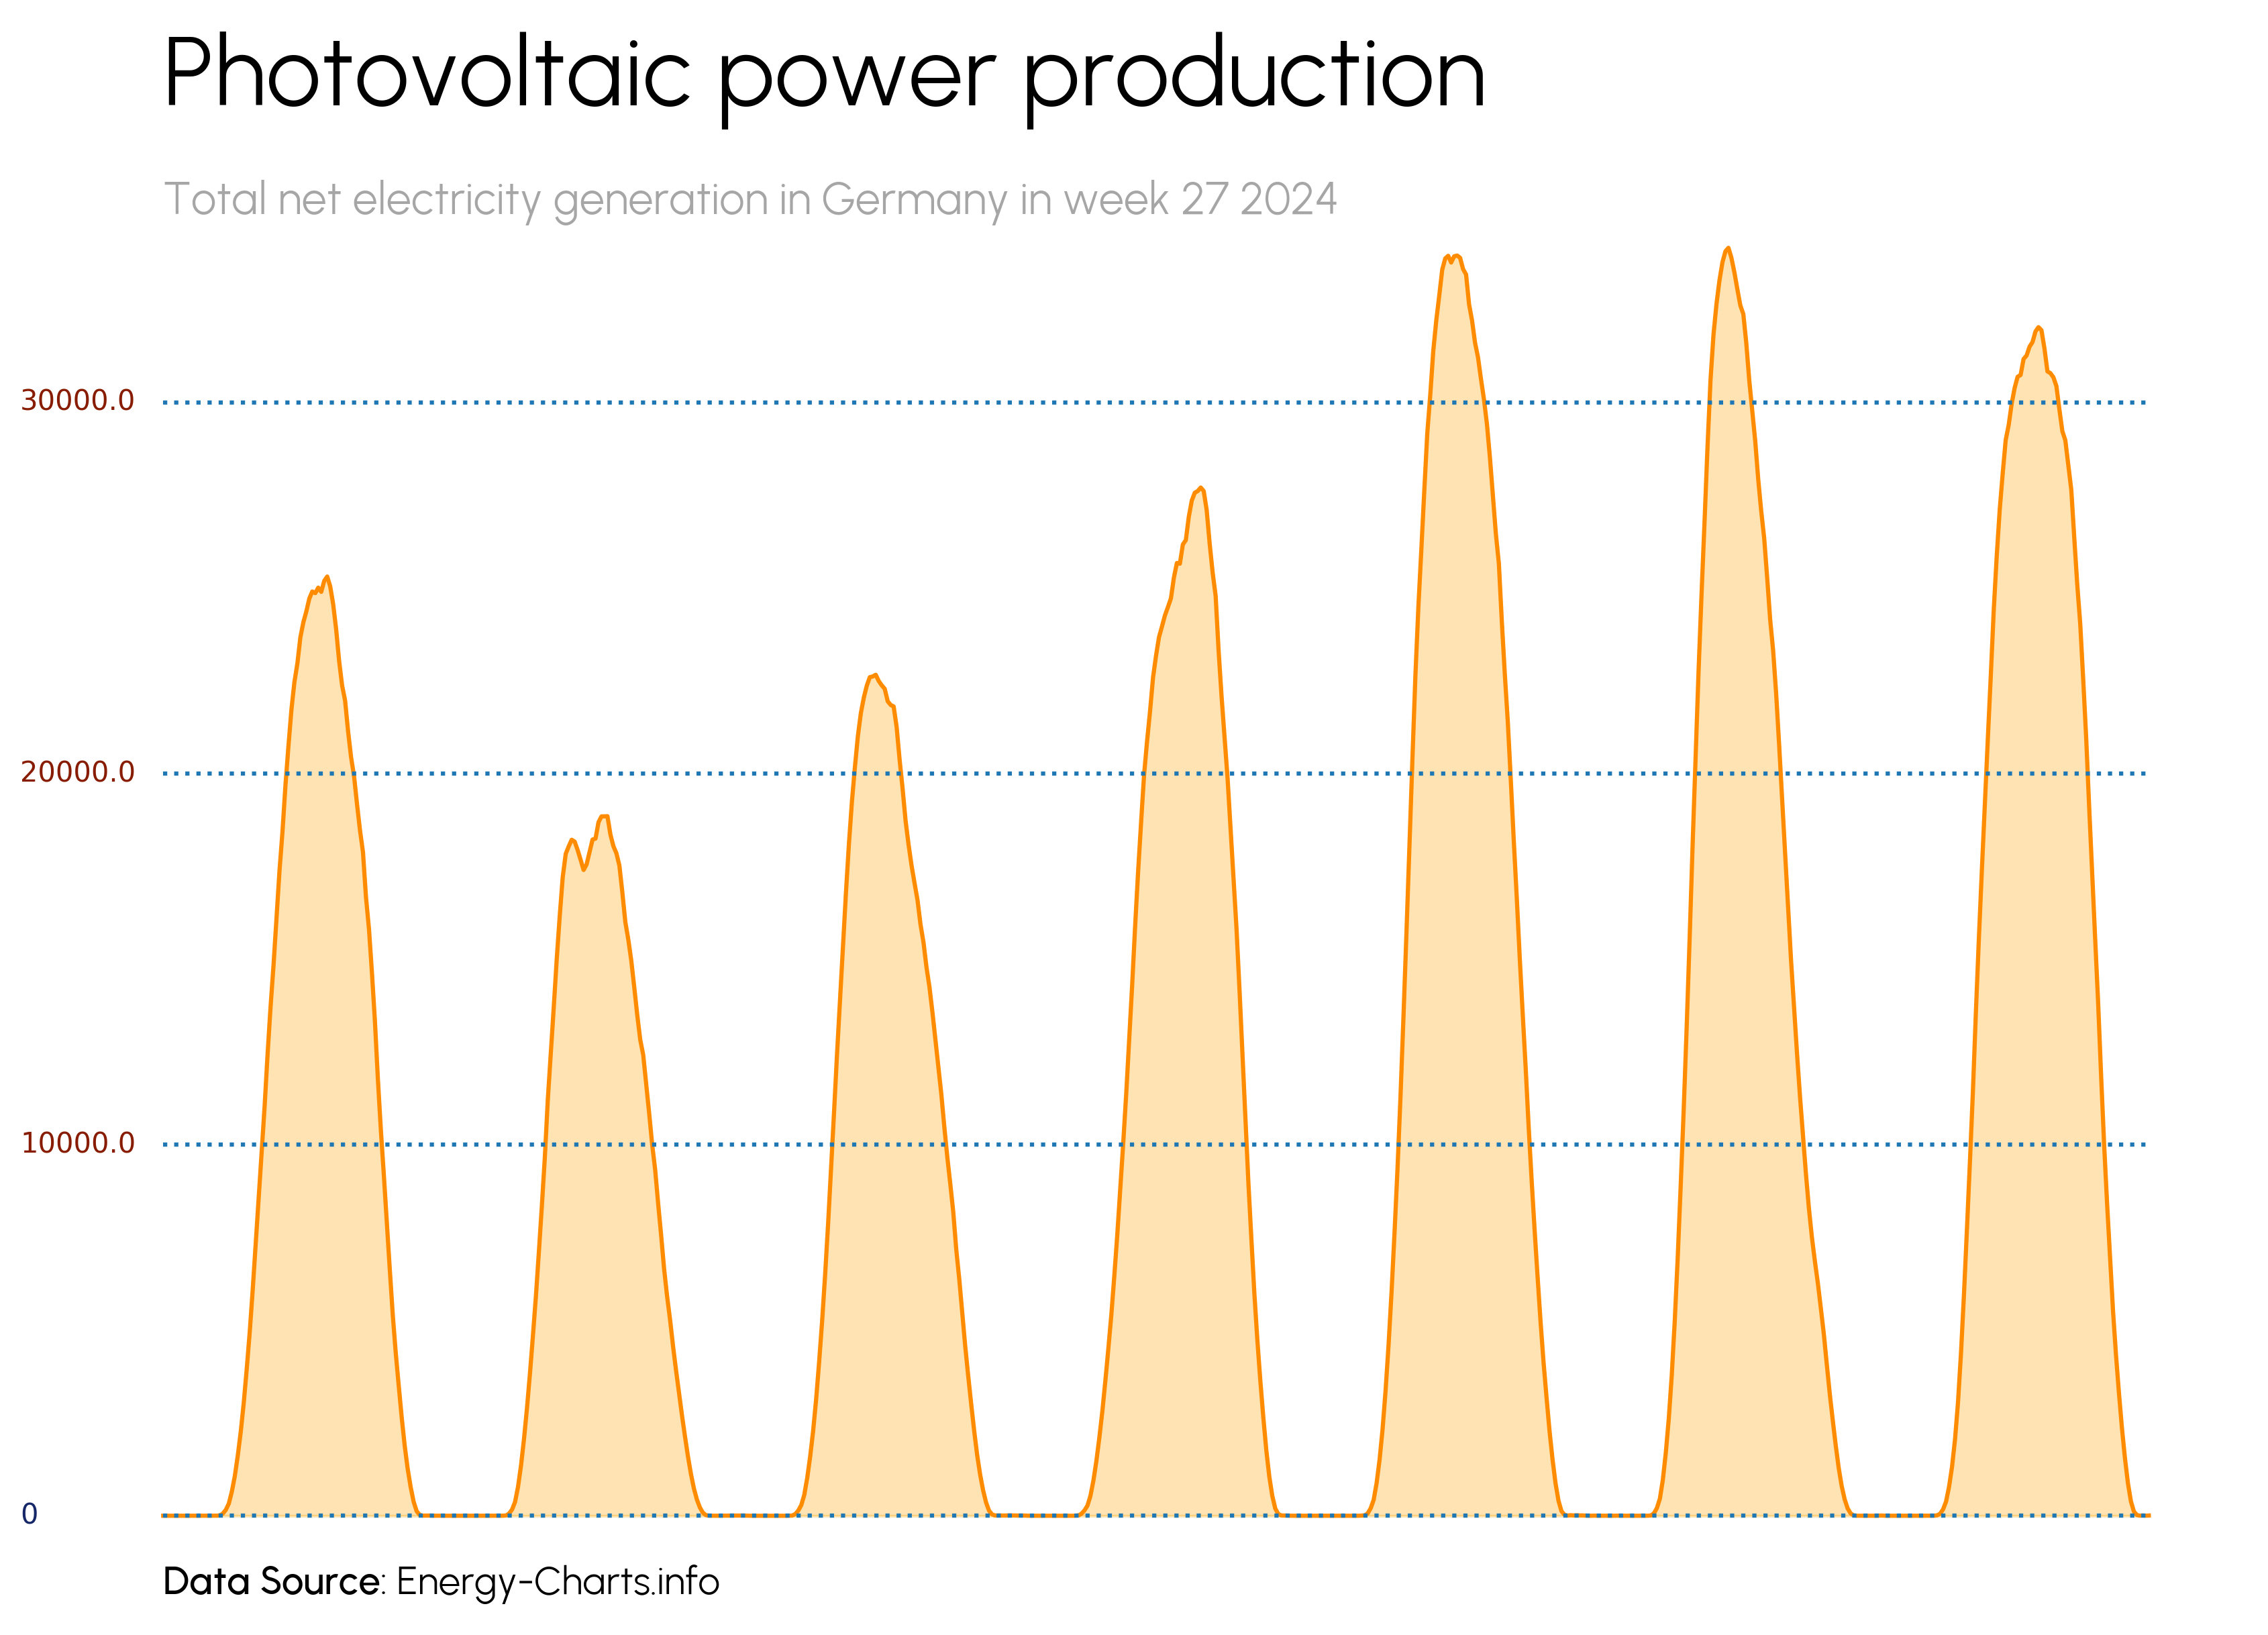

In [8]:
fig, ax = plt.subplots(figsize=(14,9), dpi=300)
ax.set_axis_off()


df = data_actual_forecast_solar_w27_2024.copy()
df.columns = ['date', 'solar', 'solar_forecast']
df['date'] = pd.to_datetime(df['date'], utc= True)
df.set_index('date', inplace= True)



plt.plot(df['solar'], c='darkorange', fillstyle='full', label='real')
plt.fill_between(df.index, 0, df["solar"], alpha=0.3, color='orange', label='real')

# plt.plot(df['solar_forecast'], color='green', label='forecast')

plt.ylabel('Power / MWh')


h_lines = [0, 1e4, 2e4, 3e4, ]
ax.hlines(y=h_lines, xmin = min(df.index), xmax= max(df.index), linestyles=':')
for value in h_lines:
    ax.text(x= min(df.index) - dt.timedelta(0.5), y=value, s= f"{value}", va='center', color= cmap(value))

s = 'Photovoltaic power production'
ax_text(x=min(df.index), y=4e4, s=s, font=font, size=35, ha='left')

s = 'Total net electricity generation in Germany in week 27 2024'
ax_text(x=min(df.index), y=3.6e4, s=s, font=font, size=16, ha='left', color='grey', alpha=0.7)

s = '\n<Data Source>: Energy-Charts.info'
ax_text(x=min(df.index), y=-1000, s=s, font=font, size=14, ha='left', highlight_textprops=[{'font': bold_font}])

In [9]:
df_price = data_spot_prices_w27_2024.copy()
df_price.columns = ['date', 'non-renewable', 'renewable', 'price']
df_price['date'] = pd.to_datetime(df_price['date'], utc= True)
df_price

,date,non-renewable,renewable,price
0,2024-06-30 22:00:00+00:00,14758.80,12972.16,94.88
1,2024-06-30 23:00:00+00:00,14708.74,12844.95,84.32
2,2024-07-01 00:00:00+00:00,14507.87,12414.22,78.19
3,2024-07-01 01:00:00+00:00,15184.38,11892.52,78.01
4,2024-07-01 02:00:00+00:00,15906.09,12036.13,75.63
...,...,...,...,...
163,2024-07-07 17:00:00+00:00,12643.16,20008.31,90.27
164,2024-07-07 18:00:00+00:00,14535.41,14286.51,125.64
165,2024-07-07 19:00:00+00:00,15278.66,12212.85,133.17
166,2024-07-07 20:00:00+00:00,15491.54,11757.88,115.20


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from pypalettes import load_cmap
from pyfonts import load_font
from highlight_text import fig_text, ax_text
from drawarrow import fig_arrow, ax_arrow

cmap = load_cmap('Coconut', cmap_type='continuous', reverse=True)
font = load_font('https://github.com/coreyhu/Urbanist/blob/main/fonts/ttf/Urbanist-Light.ttf?raw=true')
bold_font = load_font('https://github.com/coreyhu/Urbanist/blob/main/fonts/ttf/Urbanist-Medium.ttf?raw=true')

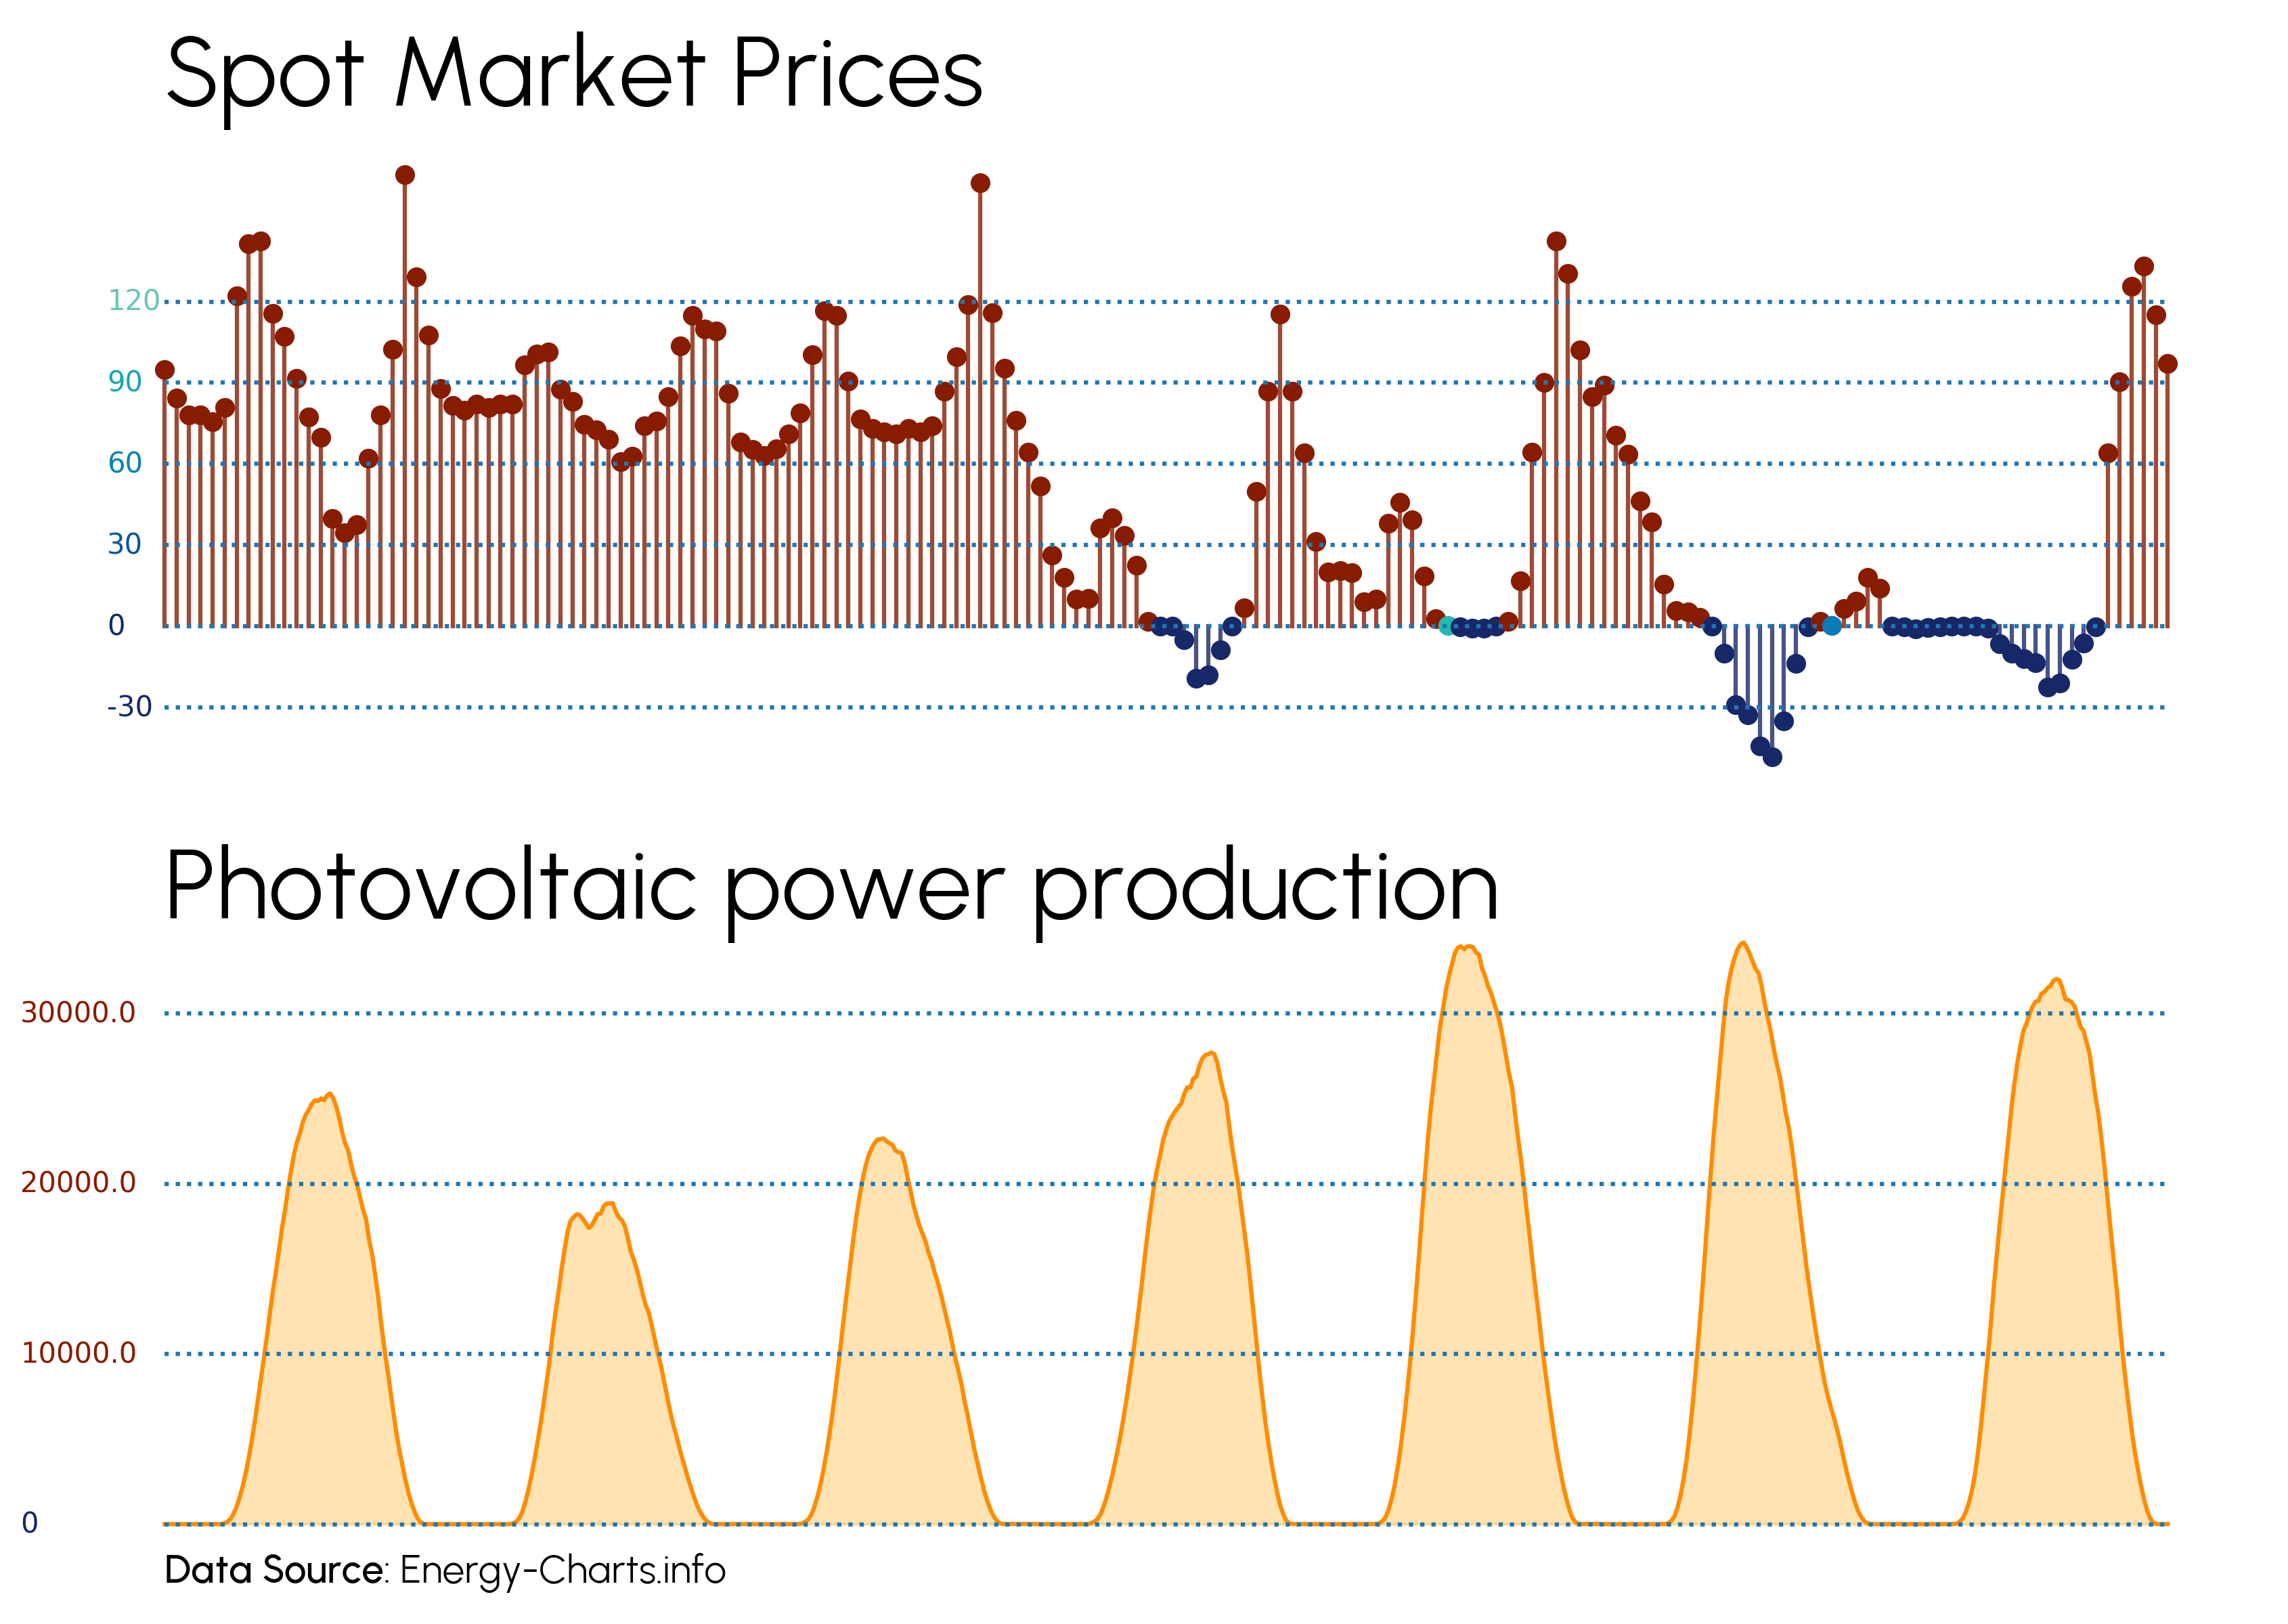

In [10]:
# fig, ax = plt.subplots(figsize=(14,9), dpi=300)
fig = plt.figure(figsize=(14,9), dpi=300)
plt.subplot(2,1,1)
ax = plt.gca()
ax.set_axis_off()

for i, row in df_price.iterrows():
   date = row['date']
   price = row['price']
   color = cmap(price)
   ax.scatter(x=date, y=price, color= color)
   ax.plot([date,date], [0,price], color= color, alpha= 0.8)



h_lines = [-30, 0, 30, 60, 90, 120]
ax.hlines(y=h_lines, xmin = min(df_price['date']), xmax= max(df_price['date']), linestyles=':')
for value in h_lines:
    ax.text(x= min(df_price['date']) - dt.timedelta(0.2), y=value, s= f"{value}", va='center', color= cmap(value))

s = 'Spot Market Prices'
ax_text(x=min(df_price['date']), y=220, s=s, font=font, size=35, ha='left')

# s = 'Electricity spot prices in Germany in week 27 2024'
# ax_text(x=min(df_price['date']), y=185, s=s, font=font, size=16, ha='left', color='grey', alpha=0.7)

# s = '<Graph>: @jeromeroeser\n<Data Source>: Energy-Charts.info'
# ax_text(x=min(df_price['date']), y=-40, s=s, font=font, size=8, ha='left', highlight_textprops=[{'font': bold_font}]*2)
# plt.show()

plt.subplot(2,1,2)
ax2 = plt.gca()
ax2.set_axis_off()

ax2.set_axis_off()


df = data_actual_forecast_solar_w27_2024.copy()
df.columns = ['date', 'solar', 'solar_forecast']
df['date'] = pd.to_datetime(df['date'], utc= True)
df.set_index('date', inplace= True)



plt.plot(df['solar'], c='darkorange', fillstyle='full', label='real')
plt.fill_between(df.index, 0, df["solar"], alpha=0.3, color='orange', label='real')

# plt.plot(df['solar_forecast'], color='green', label='forecast')

plt.ylabel('Power / MWh')


h_lines = [0, 1e4, 2e4, 3e4, ]
ax2.hlines(y=h_lines, xmin = min(df.index), xmax= max(df.index), linestyles=':')
for value in h_lines:
    ax2.text(x= min(df.index) - dt.timedelta(0.5), y=value, s= f"{value}", va='center', color= cmap(value))

s = 'Photovoltaic power production'
ax_text(x=min(df.index), y=4e4, s=s, font=font, size=35, ha='left')

# s = 'Electricity spot prices in Germany in week 27 2024'
# ax_text(x=min(df.index), y=3.6e4, s=s, font=font, size=16, ha='left', color='grey', alpha=0.7)

s = '\n<Data Source>: Energy-Charts.info'
ax_text(x=min(df.index), y=-1000, s=s, font=font, size=14, ha='left', highlight_textprops=[{'font': bold_font}])

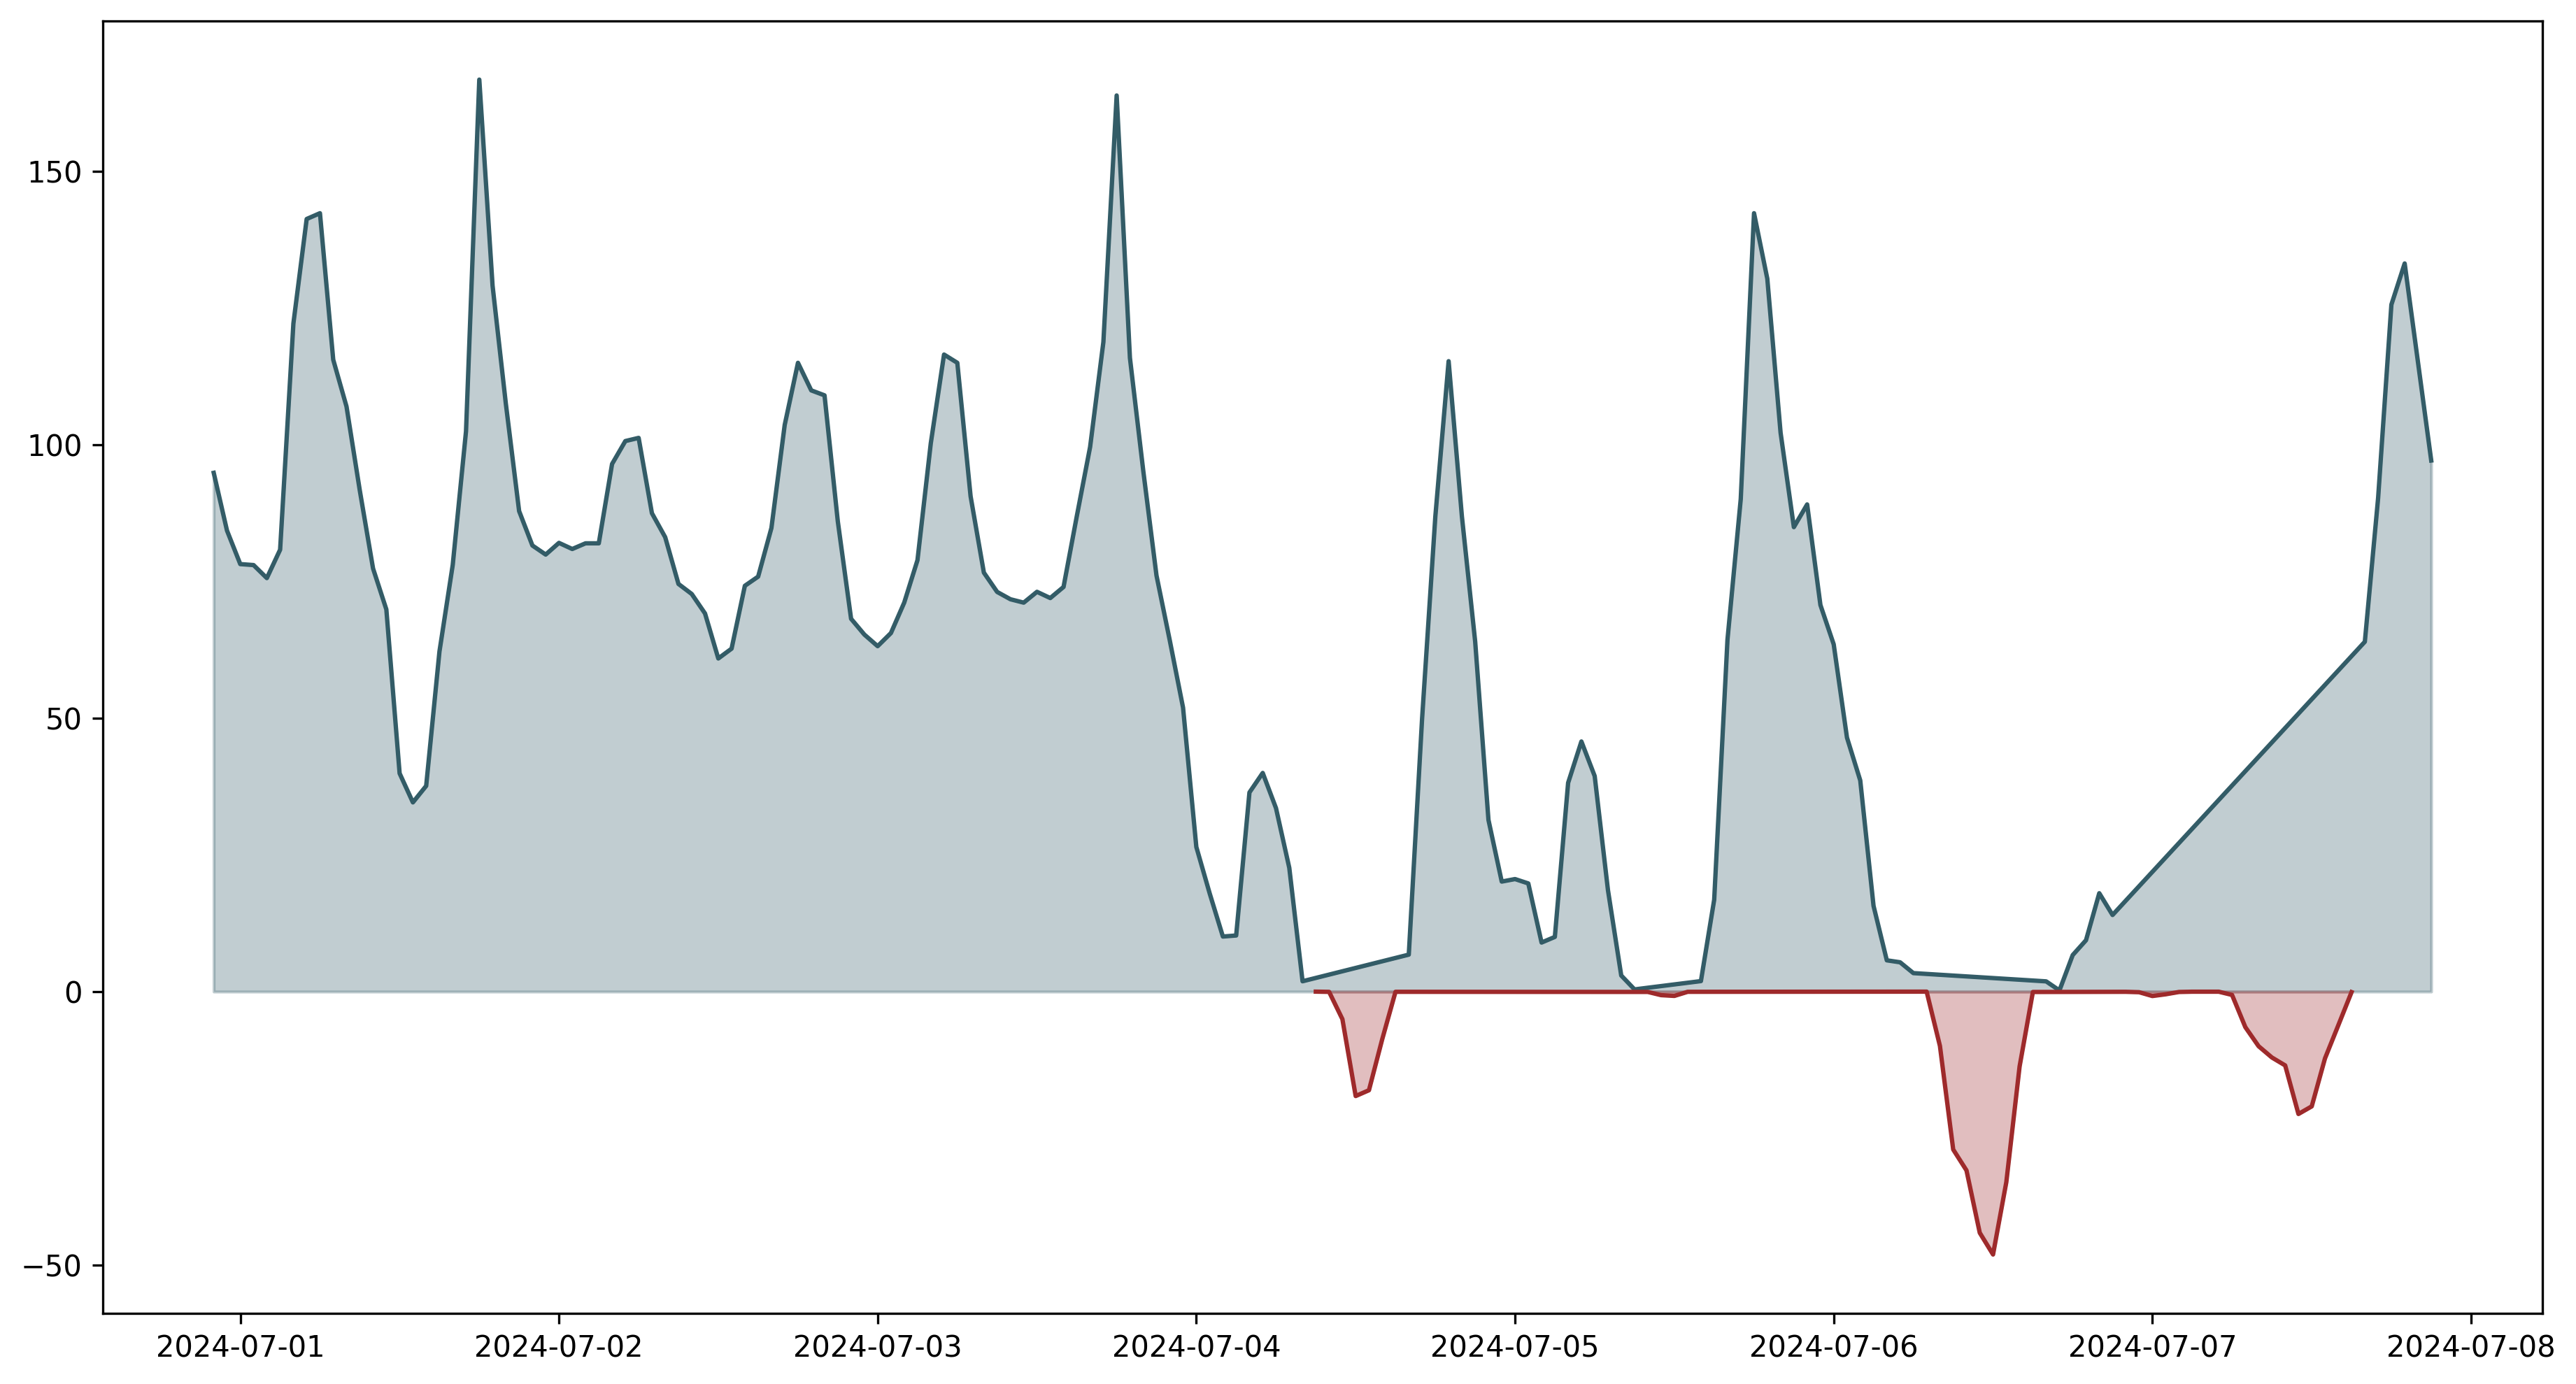

In [13]:
fig, ax = plt.subplots(dpi=300, figsize=(15,8))

# ax.plot(df_price['date'], df_price['price'])
# ax.fill_between(df_price['date'], df_price['price'], alpha=0.3)

# before
color = '#335c67'
before_df = df_price.query("price >= 0.1")
ax.plot(before_df['date'], before_df['price'], color=color)
ax.fill_between(before_df['date'], before_df['price'], alpha=0.3, color=color)

# after
color = '#9e2a2b'
after_df = df_price.query("price <= 0")
ax.plot(after_df['date'], after_df['price'], color=color)
ax.fill_between(after_df['date'], after_df['price'], alpha=0.3, color=color)


plt.show()

In [14]:
df_solar = data_actual_forecast_solar_w27_2024.copy()
df_solar.columns = ['date', 'solar', 'solar_forecast']
df_solar['date'] = pd.to_datetime(df_solar['date'], utc= True)
df_solar.set_index('date', inplace= True)
df_solar.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 667 entries, 2024-06-30 22:00:00+00:00 to 2024-07-07 20:30:00+00:00
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   solar           667 non-null    float64
 1   solar_forecast  667 non-null    float64
dtypes: float64(2)
memory usage: 15.6 KB


In [15]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

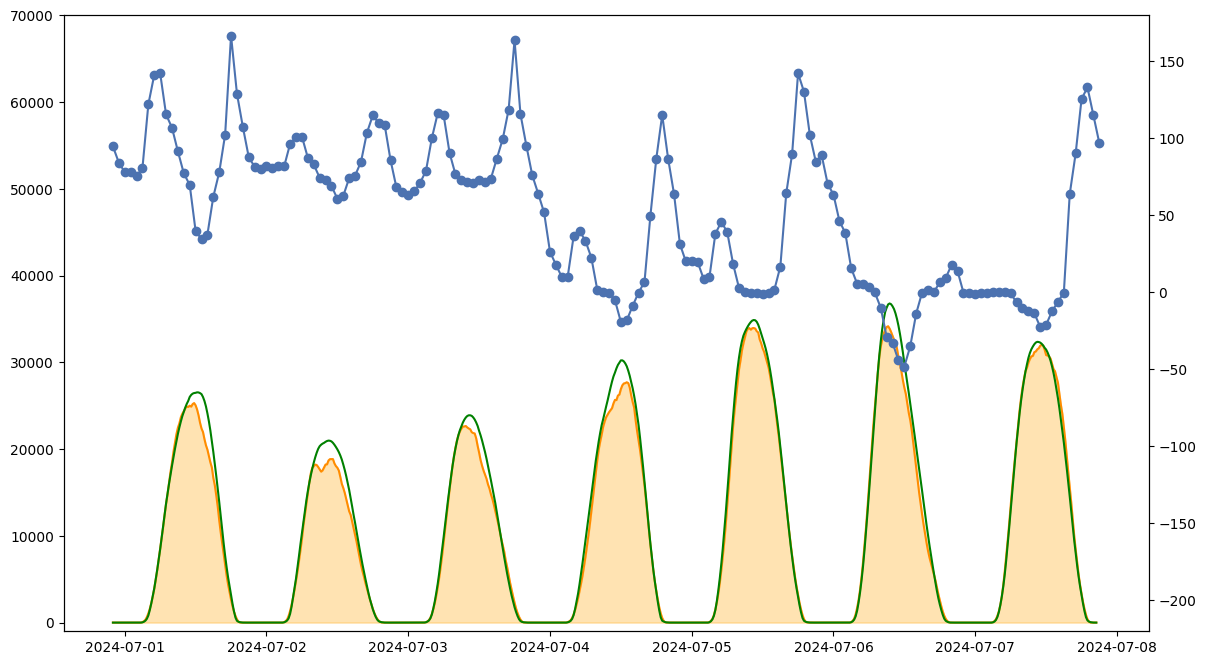

In [16]:
with plt.style.context('seaborn-v0_8-deep'):
    # figsize
    plt.figure(figsize=(14,8))
    # getting axes
    ax1 = plt.gca()
    # duplicating the ax1
    ax2 = ax1.twinx()
    # Weekly payments and Mean Payments

    ax1.plot(df_solar['solar'], c='darkorange', label='real')
    ax1.fill_between(df_solar.index, 0, df_solar["solar"], alpha=0.3, color='orange', label='real')

    ax1.plot(df_solar['solar_forecast'], color='green', label='forecast')

    ax2.scatter(df_price['date'], df_price['price'])
    ax2.plot(df_price['date'], df_price['price'])

    ax1.set_ylim(-1000, 70000)
    ax2.set_ylim(-220,180)


In [ ]:
X = np.load('X_train_full.npy')
pd.DataFrame(X[0,:,:]).boxplot()